# A Toy Model of Protein Folding
## The Basics

Proteins are made up of a string of amino acids and folded into a 3D shape. It is this 3D shape that determines its functionality -- yet its final shape is highly dependent on what chain of amino acids it is made from. There are 20 amino acids available, with varying molecular properties such as charge. A human protein is, on average, around 400 amino acids long -- all floating around in a water solution able to fold in three dimensions. Thus, the computational complexity with all the degrees of freedom is enormous. So, let us instead create a very simplistic model of protein folding to consider some outcomes. 

To simplify things, first we move from three dimensions to two, and we constrain the amino acids to be of a grid. Each bond between two adjacent amino acids forms either a 90$^\circ$ or 180$^\circ$ angle. Our next simplification is to reduce the possible net charge on an amino acid. Instead of a wide range of values, we binarize the options -- hydrophobic (non-polar) or hydophillic (polar). We these as $\textbf{H}$ for hydrophobic and $\textbf{P}$ for hydrophillic.

Now, a fundamental law of physics states that objects want to $\textit{minimize}$ their potential energy. In this context, hydrophobic amino acids will bunch up together and the overall chain will collapse together. Below are four possible shapes for a protein consisting of 4 hydrophobic amino acids.

<img src="notebook-images/image1.png" width="400">

To minimize the free energy, we count the number of unfavourable bonds -- where any hydrophobic amino acid is adjacent (along the grid lines) to a water molecule (any blank grid location indicates water) or a polar amino acid. In the example below we have a chain of six amino acids, where the first and last are $\textbf{H}$ and the rest are $\textbf{P}$. The two different orientations have different potential energy.

<img src="notebook-images/image2.png" width="400">

Now, this is a highly simplistic model but may be useful for certain analysis of protein folding. It's also just fun to consider! Now, use the built in energy calculator to determine how many unfavourable bonds are in whatever amino acid chain you want. Running the next cell will pop-up a plot which you may interact with to define chain. First, click the grid points that defines the chain structure (orange), then press the spacebar and click on which amino acids are hydrophobic (blue). Then press the spacebar again to save the protein structure and exit the plot window.

In [2]:
%matplotlib auto
import numpy as np
from random import random, randint
import matplotlib.pyplot as plt

from proteinfolding_funcs import plot_aa, save_im
from proteinfolding_classes import AminoAcidChain, ChainBuilder

grid_size = 10

chain = ChainBuilder(grid_size)

Using matplotlib backend: Qt5Agg
Now, please define which amino acids are hydrophobic.
The amino acid chain has been recorded.


Now, we can calculate the energy in the protein you just defined. Run the next cell to print out how many unfavourable bonds there are (check for yourself if you want too).

In [3]:
%matplotlib auto
aa = AminoAcidChain( len(chain.x), np.sort(chain.h), np.array(chain.x), np.array(chain.y) )
plot_aa(aa)

print("The total energy for the configuration is %d unfavourable bonds."%aa.prev_energy)

Using matplotlib backend: Qt5Agg
The total energy for the configuration is 23 quanta.


As well, you can let time evolve and see if the amino acid chain can fold into a more compact, lower energy structure. This optimization uses a variety of the Metropolis algorithm to test for better configurations. Technically, this is a Markov-chain Monte Carlo method, which generates a new (valid) structure, measures the energy and keeps it if it is lower than the previous. If not, it remains the same. This process is iterated many times. Run the next cell to try and find a more compact structure!

Step: 0 Update... Old energy:  23.0 New energy: 19.0
Step: 37 Update... Old energy:  19.0 New energy: 17.0
The lowest energy we could find is 17


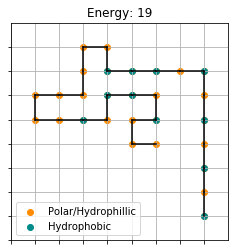

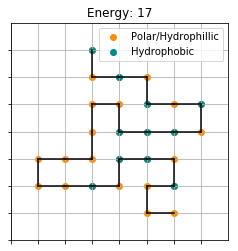

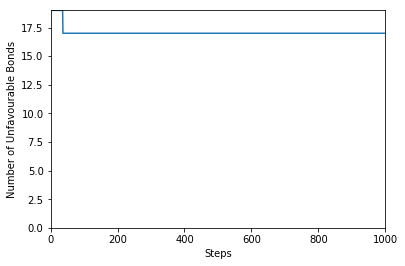

In [4]:
%matplotlib inline

num_steps = 1000
energy_change = np.zeros(num_steps)

step = 0

while step < num_steps:
    success = aa.move() 

    if success == True:
        aa.temp_energy = aa.measure_energy(aa.temp_x, aa.temp_y)
        
        if (aa.temp_energy - aa.prev_energy < 0):            

            print("Step:", step, "Update... Old energy: ", aa.prev_energy, "New energy:", aa.temp_energy)

            aa.x = np.array(aa.temp_x)
            aa.y = np.array(aa.temp_y)
            aa.prev_energy = aa.temp_energy            
            plot_aa(aa)

        else:
            pass
    
        energy_change[step] = aa.prev_energy
        step += 1
    
print("The lowest energy we could find is %d"%aa.prev_energy)

fig, ax = plt.subplots(1,1)
plt.axis([0,len(energy_change), 0, max(energy_change)])
ax.plot(energy_change)
ax.set_xlabel("Steps")
ax.set_ylabel("Number of Unfavourable Bonds")
plt.show()

Above you will see any lower energy structures and the lowest energy at each step of the optimization algorithm.

For more information, see the following references:

$\textbf{Principles of protein folding - A perspective from simple exact  models}$, Ken Dill $\textit{et al.}$ Protein Science, 1995

$\textbf{Lattice Models: The Simplest Protein}$, MIT Lecture $\texttt{http://math.mit.edu/classes/18.417/Slides/HP-protein-prediction.pdf}$

A good textbook for similar physical biology problems is $\textbf{Physical Biology of the Cell}$ by Rob Phillips, Jane Kondev, Julie Theriot, Hernan Garcia and Nigel Orme